In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from scipy.misc.pilutil import imread
from scipy.misc.pilutil import imresize


import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten, Dropout
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle
import os

In [3]:
train_data = pd.read_csv('/home/admin1/Downloads/machine_learning/week15/age-detection/train.csv')
test_data = pd.read_csv('/home/admin1/Downloads/machine_learning/week15/age-detection/test.csv')

In [4]:
train_data.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [5]:
test_data.head()

,ID
0,25321.jpg
1,989.jpg
2,19277.jpg
3,13093.jpg
4,5367.jpg


In [6]:
train_data['ID'][0]

'377.jpg'

Age:  MIDDLE


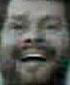

In [7]:
print('Age: ', train_data.Class[0])
Image.open('/home/admin1/Downloads/machine_learning/week15/age-detection/Train/377.jpg')

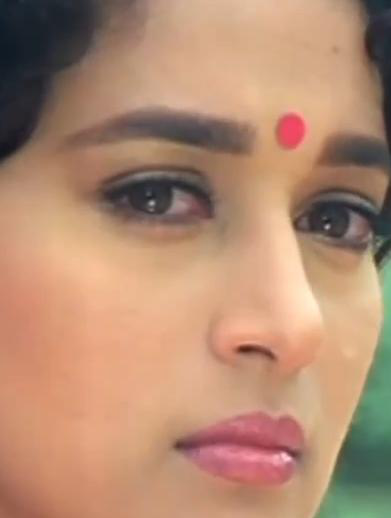

In [8]:
Image.open('/home/admin1/Downloads/machine_learning/week15/age-detection/Train/378.jpg')

we can see that the sizes of images are different

# Handling variations in shape for train dataset

In [9]:
train_dir = '/home/admin1/Downloads/machine_learning/week15/age-detection/'

In [12]:
temp = []
for img_name in train_data['ID']:
    img_path = os.path.join(train_dir, 'Train', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

/home/admin1/anaconda3/envs/new_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/home/admin1/anaconda3/envs/new_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


In [13]:
len(temp)

19906

In [14]:
x_train = np.stack(temp)

In [15]:
x_train.shape

(19906, 32, 32, 3)

# Handling Variations in shape for Test dataset

In [16]:
test_dir = '/home/admin1/Downloads/machine_learning/week15/age-detection/'

In [17]:
temp_test = []
for img_name in test_data['ID']:
    img_path = os.path.join(test_dir, 'Test', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    temp_test.append(img.astype('float32'))

/home/admin1/anaconda3/envs/new_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/home/admin1/anaconda3/envs/new_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


In [18]:
len(temp_test)

6636

In [19]:
x_test = np.stack(temp_test)

In [20]:
x_test.shape

(6636, 32, 32, 3)

We can do one more thing that could help us build a better model; i.e. we can normalize our images. Normalizing the images will make our train faster.

In [21]:
x_train = x_train / 255.
x_test = x_test/ 255.

In [22]:
x_train.shape, x_test.shape

((19906, 32, 32, 3), (6636, 32, 32, 3))

In [23]:
lb = LabelEncoder()
y_train = lb.fit_transform(train_data['Class'])
y_train = keras.utils.np_utils.to_categorical(y_train)

In [24]:
y_train.shape

(19906, 3)

# Initialising the CNN

In [25]:
classifier = Sequential()

# Convolution Layer and MaxPooling Layer

In [26]:
classifier.add(Convolution2D(filters = 32, kernel_size = (3, 3), input_shape = (32, 32, 3), activation = 'relu'))
classifier.add(Convolution2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.25))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Flattening

In [27]:
classifier.add(Flatten())

# Fully Connected Layer

In [28]:
classifier.add(Dense(units = 200, activation = 'relu'))

# Output Layer

In [29]:
classifier.add(Dense(units = 3, activation = 'softmax'))

# Compiling the Model

In [30]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               1254600   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603       
Total para

# Fitting the CNN to the Images

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [33]:
classifier.fit(X_train, Y_train,
               batch_size = 20,
               nb_epoch = 5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/home/admin1/anaconda3/envs/new_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/5
15924/15924 [==============================] - 71s 4ms/step - loss: 0.8249 - acc: 0.6302
Epoch 2/5
15924/15924 [==============================] - 69s 4ms/step - loss: 0.7325 - acc: 0.6770
Epoch 3/5
15924/15924 [==============================] - 75s 5ms/step - loss: 0.6816 - acc: 0.7000
Epoch 4/5
15924/15924 [==============================] - 81s 5ms/step - loss: 0.6233 - acc: 0.7300
Epoch 5/5
15924/15924 [==============================] - 79s 5ms/step - loss: 0.5589 - acc: 0.7639


# Storing the model in pickle file

In [34]:
pickle.dump(classifier, open('Age.pkl','wb'))

In [35]:
model = pickle.load(open('Age.pkl', 'rb'))

In [44]:
y_pred = model.predict_classes(X_test)

In [49]:
y_pred = keras.utils.np_utils.to_categorical(y_pred)

In [55]:
y_pred

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [51]:
from sklearn.metrics import accuracy_score

In [53]:
score = accuracy_score(Y_test, y_pred)
score

0.7338021094927172

# Predicting the Test set Result 

In [56]:
test_set = model.predict_classes(test_data)

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (6636, 1)